In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [3]:
make_moons?

Signature: make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
Docstring:
Make two interleaving half circles

A simple toy dataset to visualize clustering and classification
algorithms. Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int, optional (default=100)
    The total number of points generated.

shuffle : bool, optional (default=True)
    Whether to shuffle the samples.

noise : double or None (default=None)
    Standard deviation of Gaussian noise added to the data.

random_state : int, RandomState instance or None (default)
    Determines random number generation for dataset shuffling and noise.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.

Returns
-------
X : array of shape [n_samples, 2]
    The generated samples.

y : array of shape [n_samples]
    The integer labels (0 or 1) for class membership of each sample.
File:      c:\users\malik\appdata

In [4]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [6]:
log_clf = LogisticRegression(solver='lbfgs', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale",random_state=42)

In [7]:
voting_clf = VotingClassifier(
    estimators=[('log_linear', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

In [8]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_linear',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=N...
                                        

In [9]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
VotingClassifier 0.912


Ensemble Method Voting classifier in clearly performing much better then other individual algorithms  

# Soft voting 

voting='soft' in  voting classifier instance 

In [10]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [11]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
VotingClassifier 0.92


hmm! Working better then hard voting. 

#  Bagging Ensembles

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42
)


In [14]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.904

Now, if we check the accuracy of individual decision tree:

In [16]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.856

We, can clearly see bagging is better then individual Decision Tree

# Plotting

In [26]:
axes=[-1.5, 2.45, -1, 1.5]
x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

x1, x2 = np.meshgrid(x1s, x2s)

x1.ravel()

X_new = np.c_[x1.ravel(), x2.ravel()]


y_pred = tree_clf.predict(X_new).reshape(x1.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

Text(0, 0.5, '$x_2$')

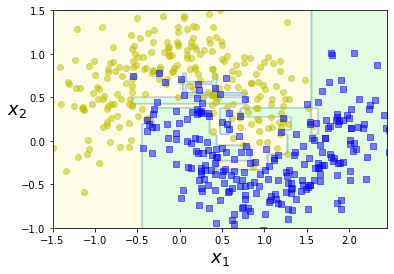

In [42]:
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
contour = plt.contourf(x1, x2, y_pred, alpha=0.3,cmap=custom_cmap)

alpha=0.5
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
plt.axis(axes)
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    
    # Creatin a Mesh Grid
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # c_ add along second axis
    # ravel is alterative of reshape(-1)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

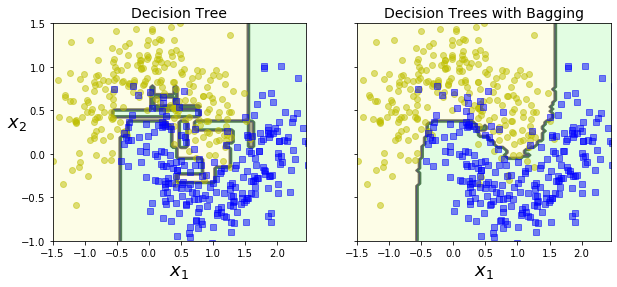

In [20]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()